Preguntas teóricas

• ¿Qué es un paradigma de programación?

Un paradigma de programación es un enfoque o forma de programar que estructura como se tiene que armar y correr 
el código de un programa. Cada paradigma tiene su conjunto de "técnicas" que guían el diseño del código, como por ejemplo la programación orientada a objetos.

• ¿En qué se basa la programación orientada a objetos?

La programación orientada a objetos es un paradigma de la programación que se basa en la creación de clases, las cuales pueden representar cosas de la vida real o conceptos mas abstractos. Cada clase tiene sus parámetros, sean datos o funciones. Un objeto corresponde a una instancia especifica de una clase. Por ejemplo, si la clase es curso del DIE un objeto podría ser Programación avanzada, este objeto podría tener atributos como integrantes del curso o funciones como get_alumno() que recibe un numero y devuelve el nombre del alumno en la lista correspondiente.

• ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?

La recursividad significa que una función se llama a sí misma para resolver sub-problemas más pequeños del problema original. En cambio, la iteración utiliza bucles para repetir un conjunto de instrucciones hasta que se cumpla una condición. En cuanto a la notación big O, la recursividad puede aumentar la complejidad si se llama a la función muchas veces, mientras que la iteración puede ser más eficiente en ciertos casos dependiendo del número de repeticiones.

• explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)

Una complejidad 𝑂(1) significa que el tiempo de ejecución es constante y no cambia en función del tamaño de los datos de entrada. En cambio, una complejidad 𝑂(𝑛) implica que el tiempo de ejecución crece linealmente con el tamaño de los datos, por lo que dependerá del tamaño de n cual corre mas rápido.

• ¿Cómo se calcula el orden en un programa que funciona por etapas?

El orden de un programa se determina utilizando la notación Big O, que mide la complejidad en función del tamaño de la entrada. Si un programa tiene múltiples etapas, se analiza cada una y se determina la complejidad total por la etapa de mayor orden, ya que Big O ignora las constantes y los términos de menor orden. La etapa más costosa será la que domine la complejidad final del programa.

• ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?

Para algoritmos recursivos, se aplica el Teorema Maestro o se resuelve la relación de recurrencia. Por ejemplo, si un algoritmo realiza dos llamadas recursivas con entradas de tamaño n/2, la recurrencia es T(n) = 2T(n/2) + O(n), resultando en O(n log n). El análisis depende tanto de la profundidad de la recursión como del trabajo realizado en cada llamada.

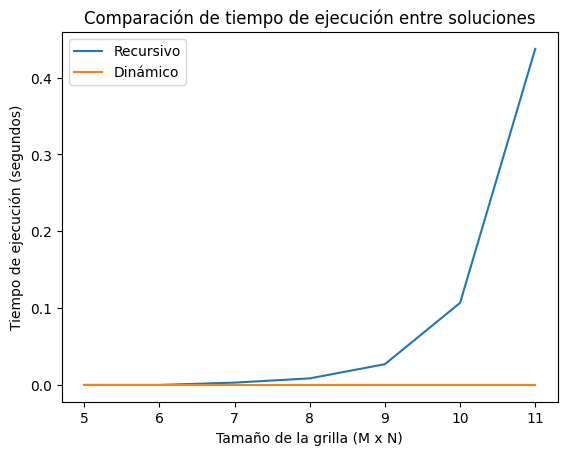

In [4]:
import time
import matplotlib.pyplot as plt

# Decorador para medir el tiempo 
def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        return resultado, fin - inicio
    return wrapper

class PCB:
    def __init__(self, N, M):
        self.N = N  #filas
        self.M = M  #columnas

    @medir_tiempo
    def caminos_recursivo(self, x=0, y=0):
        if x == self.N - 1 and y == self.M - 1:
            return 1
        if x >= self.N or y >= self.M:
            return 0
        return self.caminos_recursivo(x + 1, y)[0] + self.caminos_recursivo(x, y + 1)[0]

    @medir_tiempo
    def caminos_dinamico(self):
        dp = [[0] * self.M for _ in range(self.N)]
        for i in range(self.N):
            for j in range(self.M):
                if i == 0 or j == 0:
                    dp[i][j] = 1
                else:
                    dp[i][j] = dp[i - 1][j] + dp[i][j - 1]
        return dp[self.N - 1][self.M - 1]

# Función para graficar
def graficar_tiempos(tiempos, tamaños, soluciones):
    for i, tiempo in enumerate(tiempos):
        plt.plot(tamaños, tiempo, label=soluciones[i])
    plt.xlabel("Tamaño de la grilla (M x N)")
    plt.ylabel("Tiempo de ejecución (segundos)")
    plt.title("Comparación de tiempo de ejecución entre soluciones")
    plt.legend()
    plt.savefig("tiempos_ejecucion.svg")
    plt.show()

# Probamos
tamaños = [5,6,7,8,9,10,11]
tiempos_recursivo = []
tiempos_dinamico = []

for tam in tamaños:
    pcb = PCB(tam, tam)
    _, tiempo_recursivo = pcb.caminos_recursivo()
    _, tiempo_dinamico = pcb.caminos_dinamico()
    tiempos_recursivo.append(tiempo_recursivo)
    tiempos_dinamico.append(tiempo_dinamico)

graficar_tiempos([tiempos_recursivo, tiempos_dinamico], tamaños, ["Recursivo", "Dinámico"])
